In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [4]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [5]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

In [7]:
logreg=LogisticRegression()
svm=SVC()
dt=DecisionTreeClassifier()

In [8]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    ac=accuracy_score(ytest,ypred)
    cr=classification_report(ytest,ypred)
    
    print(f"Accuracy_score {ac}")
    print(f"Classification_report {cr}")
          

In [9]:
mymodel(logreg)

Accuracy_score 0.7659002687369364
Classification_report               precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.77      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.77      0.77      0.77      3349



In [10]:
mymodel(svm)

Accuracy_score 0.7414153478650344
Classification_report               precision    recall  f1-score   support

           0       0.72      0.84      0.77      1760
           1       0.78      0.63      0.70      1589

    accuracy                           0.74      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.74      0.74      3349



In [11]:
mymodel(dt)

Accuracy_score 0.7856076440728575
Classification_report               precision    recall  f1-score   support

           0       0.79      0.81      0.80      1760
           1       0.78      0.76      0.77      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.78      0.78      3349
weighted avg       0.79      0.79      0.79      3349



## checking overfitting

In [12]:
dt.score(xtrain,ytrain)

1.0

In [13]:
dt.score(xtest,ytest)

0.7856076440728575

In [14]:
#training acc is high -----> training eroor is low ---->low bias 
#testing acc is low ----> testing error is high ---->high variance
#low bias and hgh variance ---->overfitting

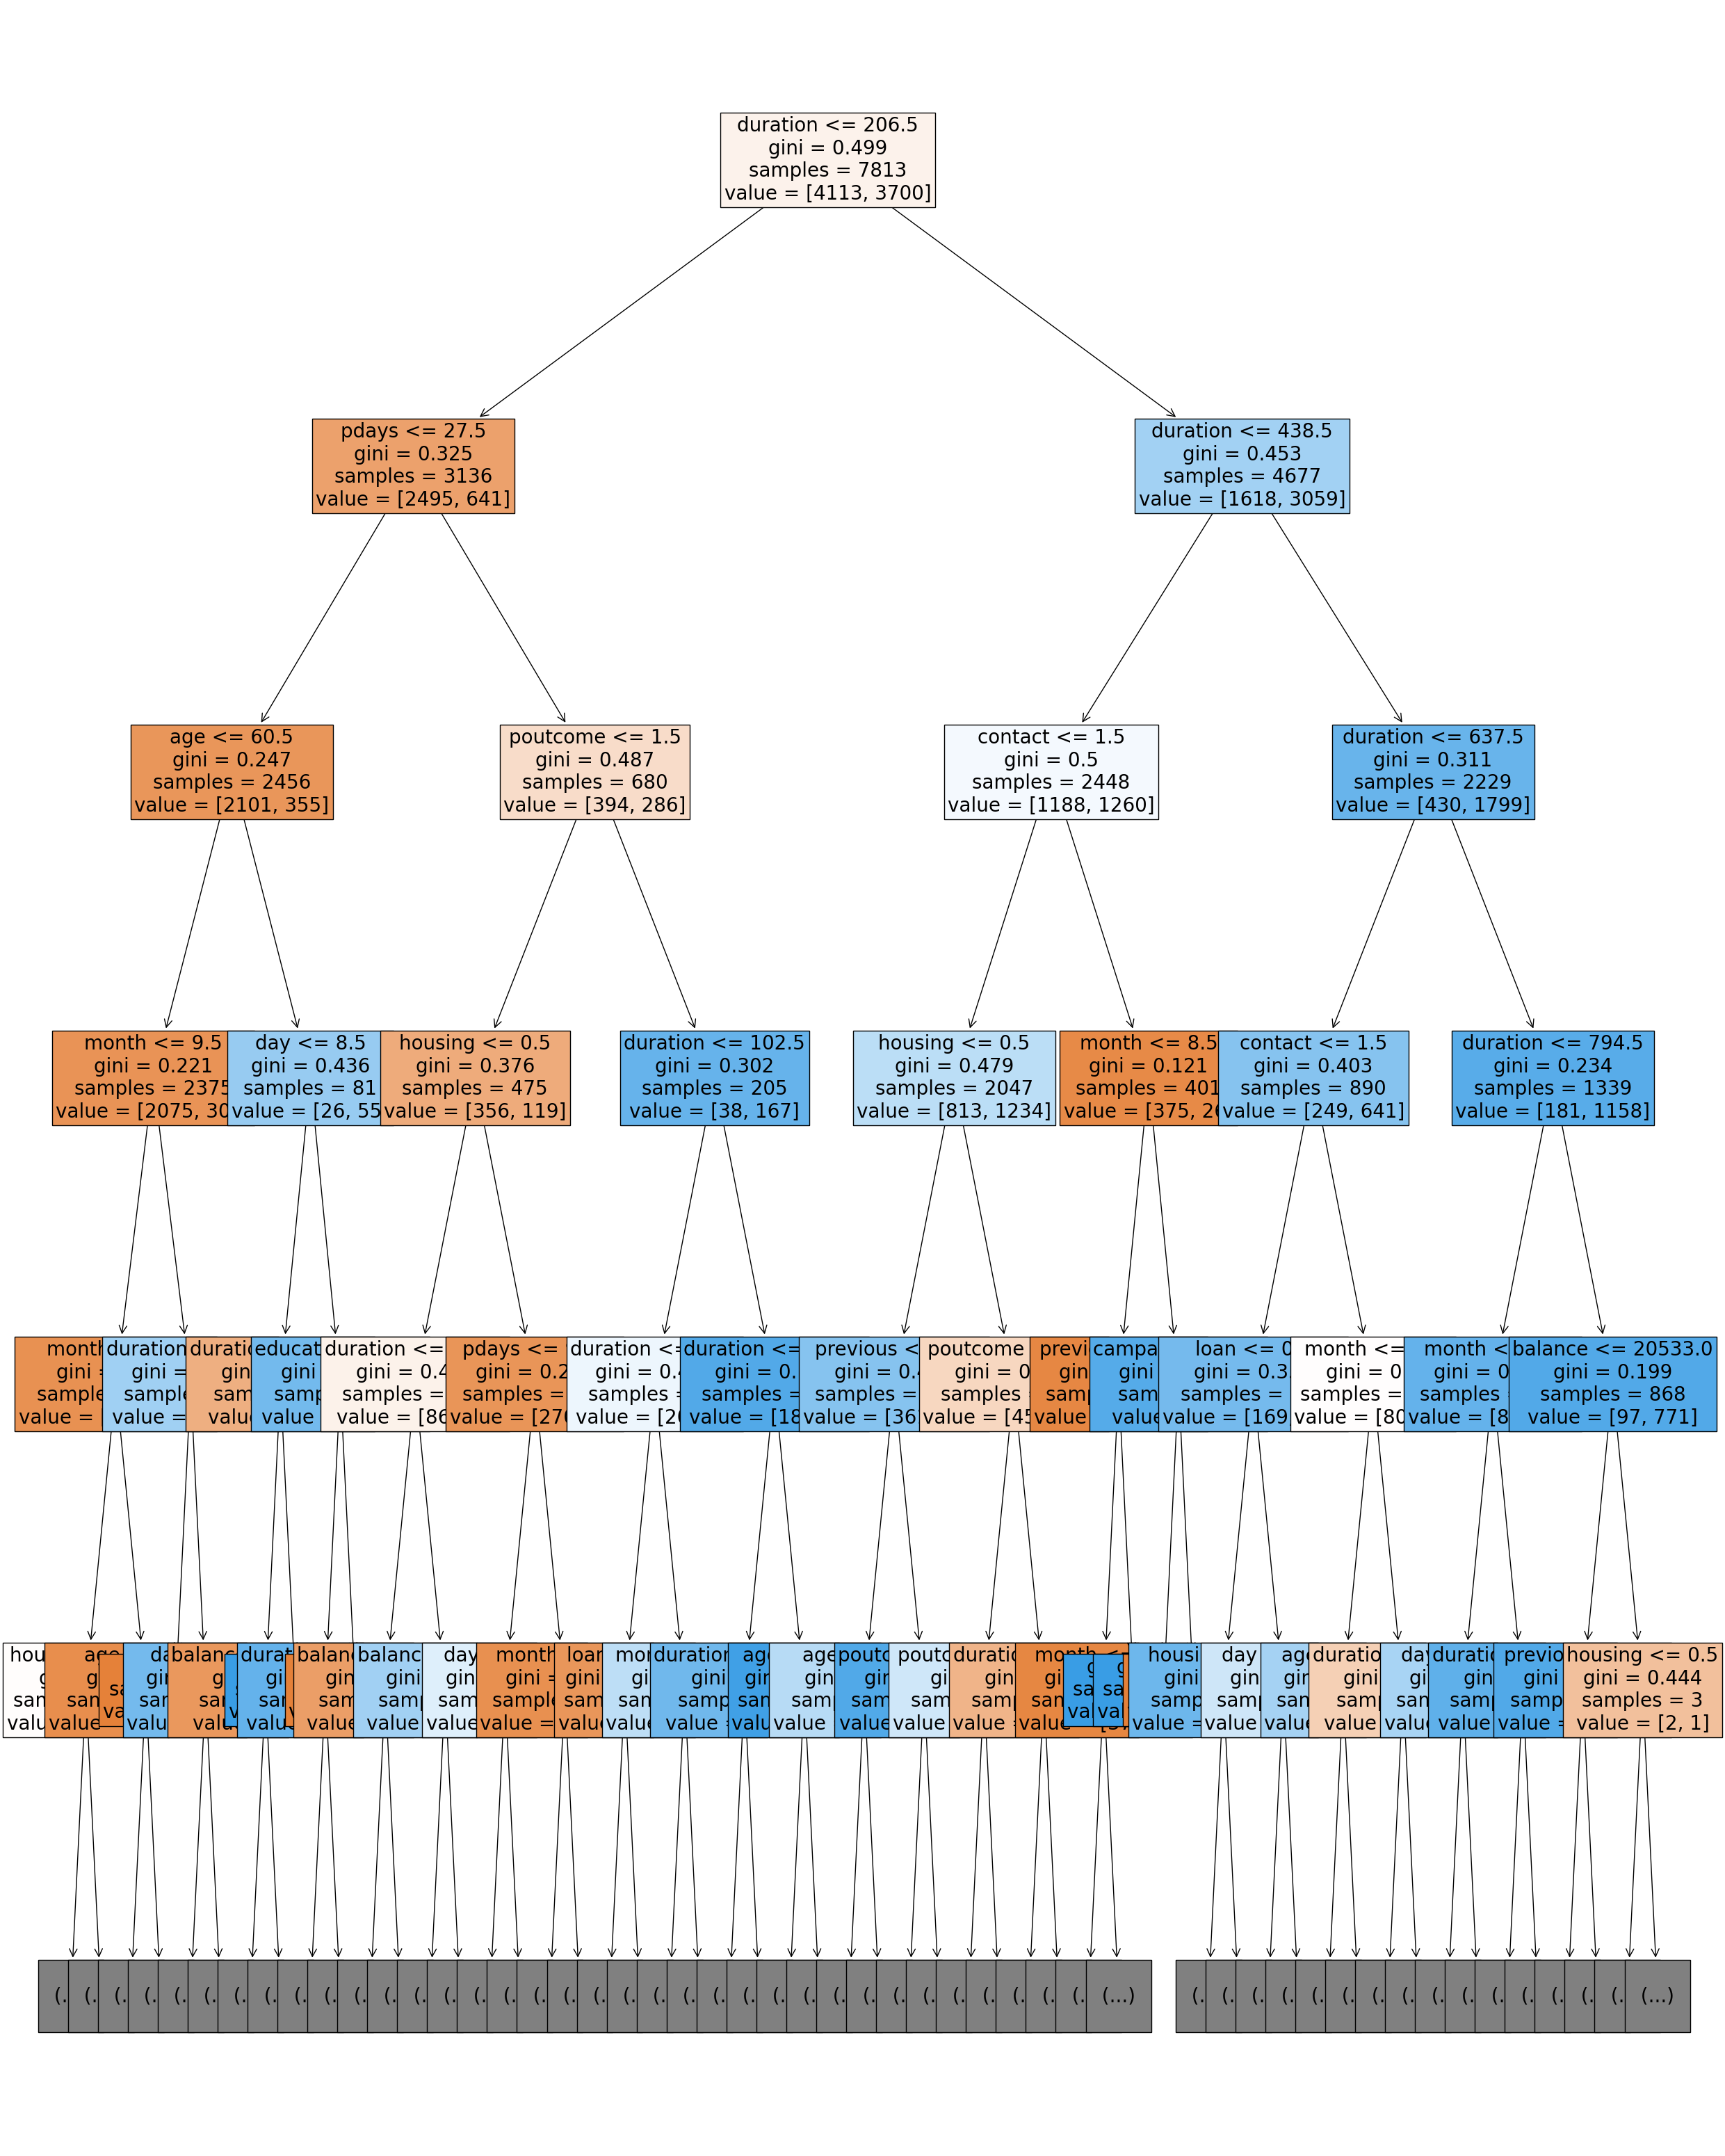

In [15]:
fig,ax=plt.subplots(figsize=(30,40))
chart=tree.plot_tree(dt,max_depth=5,feature_names=x.columns,filled=True,fontsize=20)
plt.savefig('abc1')

## PRUNING TECHNIQUES

### Max dept

In [19]:
for i in range(1,30):
    dt1=DecisionTreeClassifier(max_depth=12)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"max_dept={i} accuracy= {ac}")

max_dept=1 accuracy= 0.8148701104807405
max_dept=2 accuracy= 0.8136757240967453
max_dept=3 accuracy= 0.8121827411167513
max_dept=4 accuracy= 0.8127799343087488
max_dept=5 accuracy= 0.8160644968647357
max_dept=6 accuracy= 0.8163630934607345
max_dept=7 accuracy= 0.8139743206927441
max_dept=8 accuracy= 0.8160644968647357
max_dept=9 accuracy= 0.8121827411167513
max_dept=10 accuracy= 0.8148701104807405
max_dept=11 accuracy= 0.8145715138847417
max_dept=12 accuracy= 0.8130785309047477
max_dept=13 accuracy= 0.8130785309047477
max_dept=14 accuracy= 0.8145715138847417
max_dept=15 accuracy= 0.8181546730367274
max_dept=16 accuracy= 0.8178560764407286
max_dept=17 accuracy= 0.8136757240967453
max_dept=18 accuracy= 0.8109883547327561
max_dept=19 accuracy= 0.8169602866527321
max_dept=20 accuracy= 0.814272917288743
max_dept=21 accuracy= 0.8160644968647357
max_dept=22 accuracy= 0.814272917288743
max_dept=23 accuracy= 0.8112869513287548
max_dept=24 accuracy= 0.815765900268737
max_dept=25 accuracy= 0.8181

### Re-building the model with max_depth as 3

In [94]:
dt2=DecisionTreeClassifier(max_depth=3)
mymodel(dt2)

Accuracy_score 0.771275007464915
Classification_report               precision    recall  f1-score   support

           0       0.85      0.69      0.76      1760
           1       0.71      0.86      0.78      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.78      0.77      3349
weighted avg       0.78      0.77      0.77      3349



### checking and overfitting 

In [95]:
dt2.score(xtrain,ytrain)

0.7757583514655062

In [96]:
dt2.score(xtest,ytest)

0.771275007464915

### Min_samples_leaf

In [97]:
for i in range(70,100):
    dt3=DecisionTreeClassifier(min_samples_leaf=12)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min_samples_leaf={i} accuracy= {ac}")

min_samples_leaf=70 accuracy= 0.8160644968647357
min_samples_leaf=71 accuracy= 0.8136757240967453
min_samples_leaf=72 accuracy= 0.8139743206927441
min_samples_leaf=73 accuracy= 0.8130785309047477
min_samples_leaf=74 accuracy= 0.8136757240967453
min_samples_leaf=75 accuracy= 0.8136757240967453
min_samples_leaf=76 accuracy= 0.8151687070767393
min_samples_leaf=77 accuracy= 0.814272917288743
min_samples_leaf=78 accuracy= 0.8160644968647357
min_samples_leaf=79 accuracy= 0.8145715138847417
min_samples_leaf=80 accuracy= 0.8148701104807405
min_samples_leaf=81 accuracy= 0.8160644968647357
min_samples_leaf=82 accuracy= 0.8127799343087488
min_samples_leaf=83 accuracy= 0.8115855479247537
min_samples_leaf=84 accuracy= 0.8145715138847417
min_samples_leaf=85 accuracy= 0.8148701104807405
min_samples_leaf=86 accuracy= 0.815765900268737
min_samples_leaf=87 accuracy= 0.8121827411167513
min_samples_leaf=88 accuracy= 0.8154673036727381
min_samples_leaf=89 accuracy= 0.8139743206927441
min_samples_leaf=90 ac

### Re-building the model with min_samples_leaf as 89

In [98]:
dt3=DecisionTreeClassifier(min_samples_leaf=89)
mymodel(dt3)

Accuracy_score 0.8100925649447597
Classification_report               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1760
           1       0.79      0.82      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



### checking and overfitting

In [99]:
dt3.score(xtrain,ytrain)

0.8192755663637528

In [100]:
dt3.score(xtest,ytest)

0.8100925649447597

## min_samples_split

In [101]:
for i in range(70,100):
    dt4=DecisionTreeClassifier(min_samples_split=12)
    dt4.fit(xtrain,ytrain)
    ypred=dt4.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min_samples_split={i} accuracy= {ac}")

min_samples_split=70 accuracy= 0.7894893998208421
min_samples_split=71 accuracy= 0.7885936100328457
min_samples_split=72 accuracy= 0.7876978202448492
min_samples_split=73 accuracy= 0.7888922066288444
min_samples_split=74 accuracy= 0.7897879964168408
min_samples_split=75 accuracy= 0.7939683487608241
min_samples_split=76 accuracy= 0.7859062406688564
min_samples_split=77 accuracy= 0.7891908032248433
min_samples_split=78 accuracy= 0.7891908032248433
min_samples_split=79 accuracy= 0.7882950134368468
min_samples_split=80 accuracy= 0.7900865930128397
min_samples_split=81 accuracy= 0.7897879964168408
min_samples_split=82 accuracy= 0.7856076440728575
min_samples_split=83 accuracy= 0.7900865930128397
min_samples_split=84 accuracy= 0.7894893998208421
min_samples_split=85 accuracy= 0.786503433860854
min_samples_split=86 accuracy= 0.7918781725888325
min_samples_split=87 accuracy= 0.7918781725888325
min_samples_split=88 accuracy= 0.7906837862048373
min_samples_split=89 accuracy= 0.7882950134368468
m

### Re-building the model with min_samples_split as 89

In [109]:
dt4=DecisionTreeClassifier(min_samples_leaf=89)
mymodel(dt4)

Accuracy_score 0.8100925649447597
Classification_report               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1760
           1       0.79      0.82      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



### checking and overfitting

In [110]:
dt4.score(xtrain,ytrain)

0.8192755663637528

In [111]:
dt4.score(xtest,ytest)

0.8100925649447597